In [109]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [102]:
!pip install factor_analyzer

     |████████████████████████████████| 51kB 1.3MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-cp37-none-any.whl size=42568 sha256=77fee0f77be5632f24669d4c6e6d02e5f5df7b79362936ef88a5916642837b96
  Stored in directory: /home/nemf4/.cache/pip/wheels/17/31/e2/e954d8bc7b421fde5fede31d1365fce5612bdacadf7e007815
Successfully built factor-analyzer


In [110]:
pd.set_option('display.max_columns',None)

In [111]:
df = pd.read_excel('./oecd_data_with_Medianfillna_missing_values.xlsx')

In [112]:
df.head()

,Reference area,TIME_PERIOD,Average annual gross earnings,"Deaths from suicide, alcohol, drugs",Employment rate,Exposed to air pollution,Feeling safe at night,Homicides,Household disposable income below the relative income poverty line,Households and NPISHs net adjusted disposable income per capita,Households living in overcrowded conditions,Households with internet access at home,Housing affordability,Housing cost overburden,Lack of social support,Life expectancy at birth,Long hours in paid work,Long-term unemployment rate,Negative affect balance,Not feeling safe at night,Perceived health as negative,Perceived health as positive,Poor households without access to basic sanitary facilities,Road deaths,Social support,Top average household disposable income quintile,Top earnings of full-time employees decile,"Youth not in employment, education or training"
0,Austria,2010,55693,24.496159,74.646021,97.069,77.545868,0.5,8.9,33591.0,10.234319,63.7002,79.872434,11.218890,4.934193,80.7,9.001209,1.246748,7.415262,18.822950,9.3,69.5,5.477113,6.609478,94.573729,4.3,3.385268,9.617456
1,Austria,2011,55086,24.652084,74.744983,98.692,81.849720,0.5,9.1,33369.0,10.712656,71.9837,79.548878,8.309880,5.519950,81.1,8.716317,1.216149,8.367779,15.110250,9.5,68.7,4.103295,6.244654,93.327370,4.3,3.343465,8.438075
2,Austria,2012,55399,23.690651,75.154669,96.542,82.291523,0.4,9.6,33682.0,11.594034,77.4086,79.498162,12.370545,5.441617,81.1,8.522895,1.230820,8.633878,14.243898,9.0,70.0,3.384494,6.315323,93.753634,4.3,3.354148,8.395759
3,Austria,2013,55425,22.327251,75.270166,96.430,84.675143,0.4,9.0,33017.0,11.928257,79.7862,79.101885,12.985978,5.009296,81.3,7.596390,1.333638,9.897116,14.387543,9.1,68.6,2.131753,5.383430,94.795705,4.2,3.312102,8.780428
4,Austria,2014,55629,22.844975,75.027459,89.034,81.202589,0.4,9.1,33032.0,12.688166,79.3764,79.113785,11.529214,10.051983,81.6,7.320278,1.552865,9.619929,18.130529,8.9,69.5,3.738199,5.054194,89.394312,4.1,3.327037,9.783800


In [113]:
df.isnull().sum()

Reference area                                                         0
TIME_PERIOD                                                            0
Average annual gross earnings                                          0
Deaths from suicide, alcohol, drugs                                    0
Employment rate                                                        0
Exposed to air pollution                                               0
Feeling safe at night                                                  0
Homicides                                                              0
Household disposable income below the relative income poverty line     0
Households and NPISHs net adjusted disposable income per capita       11
Households living in overcrowded conditions                           11
Households with internet access at home                                0
Housing affordability                                                  0
Housing cost overburden                            

In [114]:
df['Reference area'].unique()

array(['Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
       'Italy', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Türkiye', 'United Kingdom', 'United States'], dtype=object)

In [115]:
df = df[~df['Reference area'].isin(['Korea', 'Latvia', 'Canada', 'Türkiye' , 'Slovak Republic', 'Estonia', 'New Zealand'])]

In [116]:
df.isnull().sum()

Reference area                                                        0
TIME_PERIOD                                                           0
Average annual gross earnings                                         0
Deaths from suicide, alcohol, drugs                                   0
Employment rate                                                       0
Exposed to air pollution                                              0
Feeling safe at night                                                 0
Homicides                                                             0
Household disposable income below the relative income poverty line    0
Households and NPISHs net adjusted disposable income per capita       0
Households living in overcrowded conditions                           0
Households with internet access at home                               0
Housing affordability                                                 0
Housing cost overburden                                         

In [117]:
df.head()

,Reference area,TIME_PERIOD,Average annual gross earnings,"Deaths from suicide, alcohol, drugs",Employment rate,Exposed to air pollution,Feeling safe at night,Homicides,Household disposable income below the relative income poverty line,Households and NPISHs net adjusted disposable income per capita,Households living in overcrowded conditions,Households with internet access at home,Housing affordability,Housing cost overburden,Lack of social support,Life expectancy at birth,Long hours in paid work,Long-term unemployment rate,Negative affect balance,Not feeling safe at night,Perceived health as negative,Perceived health as positive,Poor households without access to basic sanitary facilities,Road deaths,Social support,Top average household disposable income quintile,Top earnings of full-time employees decile,"Youth not in employment, education or training"
0,Austria,2010,55693,24.496159,74.646021,97.069,77.545868,0.5,8.9,33591.0,10.234319,63.7002,79.872434,11.218890,4.934193,80.7,9.001209,1.246748,7.415262,18.822950,9.3,69.5,5.477113,6.609478,94.573729,4.3,3.385268,9.617456
1,Austria,2011,55086,24.652084,74.744983,98.692,81.849720,0.5,9.1,33369.0,10.712656,71.9837,79.548878,8.309880,5.519950,81.1,8.716317,1.216149,8.367779,15.110250,9.5,68.7,4.103295,6.244654,93.327370,4.3,3.343465,8.438075
2,Austria,2012,55399,23.690651,75.154669,96.542,82.291523,0.4,9.6,33682.0,11.594034,77.4086,79.498162,12.370545,5.441617,81.1,8.522895,1.230820,8.633878,14.243898,9.0,70.0,3.384494,6.315323,93.753634,4.3,3.354148,8.395759
3,Austria,2013,55425,22.327251,75.270166,96.430,84.675143,0.4,9.0,33017.0,11.928257,79.7862,79.101885,12.985978,5.009296,81.3,7.596390,1.333638,9.897116,14.387543,9.1,68.6,2.131753,5.383430,94.795705,4.2,3.312102,8.780428
4,Austria,2014,55629,22.844975,75.027459,89.034,81.202589,0.4,9.1,33032.0,12.688166,79.3764,79.113785,11.529214,10.051983,81.6,7.320278,1.552865,9.619929,18.130529,8.9,69.5,3.738199,5.054194,89.394312,4.1,3.327037,9.783800


In [118]:
df.to_csv('clean_oecd.csv', index=False)  

# Composite Health and Well-being Index (CHWI)


Given your goal to relate an outcome variable to the nations' healths and the recommendation to consider creating a composite measure of two or more variables, you could develop a comprehensive index that integrates various dimensions of health and well-being. This approach would allow you to capture a broader and more nuanced picture of a nation's health status beyond traditional single measures like life expectancy or perceived health.

Suggested Composite Health and Well-being Index (CHWI)
To construct the Composite Health and Well-being Index (CHWI), you might select a balanced mix of variables from different domains (e.g., physical health, mental health, socio-economic conditions, environmental factors) that together provide a multi-faceted view of health and well-being. Here’s a proposed structure:

#### 1. Physical Health and Safety Component (PHSC)
1. Life Expectancy at Birth: A fundamental measure of overall health and longevity in a population.
2. Deaths from Suicide, Alcohol, Drugs: Indicates mental health and substance abuse challenges.
3. Exposed to Air Pollution: Environmental health risks affecting respiratory and cardiovascular health.
4. Homicides: Safety and security aspect, affecting mental well-being.
5. Road Deaths: Reflects safety in transportation and urban planning.

#### 2. Socio-economic Well-being Component (SWBC)
1. Household Disposable Income Below the Relative Income Poverty Line: Economic security and its impact on health.
2. Households and NPISHs Net Adjusted Disposable Income Per Capita: General economic well-being and its capacity to access health services.
3. Employment Rate: Economic stability and its known correlation with health outcomes.
4. Housing Affordability: Reflects the ability to live in healthy environments without financial strain.
5. Youth Not in Employment, Education or Training: Indicative of future economic and health vulnerabilities.

#### 3. Mental Health and Social Support Component (MHSSC)
1. Perceived Health as Positive: Self-assessment of health, which is closely linked to mental well-being.
2. Lack of Social Support: Impacts mental health and resilience.
3. Feeling Safe at Night: Reflects both actual safety and perceived security, important for mental health.
4. Negative Affect Balance: Psychological distress and well-being.
5. Long-term Unemployment Rate: Associated with increased risks of mental health issues.


## 1. Physical Health and Safety Component (PHSC)

In [119]:
df_phsc = df[['Reference area','TIME_PERIOD','Life expectancy at birth','Deaths from suicide, alcohol, drugs','Exposed to air pollution','Homicides','Road deaths']]



In [120]:
df_phsc.head()

,Reference area,TIME_PERIOD,Life expectancy at birth,"Deaths from suicide, alcohol, drugs",Exposed to air pollution,Homicides,Road deaths
0,Austria,2010,80.7,24.496159,97.069,0.5,6.609478
1,Austria,2011,81.1,24.652084,98.692,0.5,6.244654
2,Austria,2012,81.1,23.690651,96.542,0.4,6.315323
3,Austria,2013,81.3,22.327251,96.430,0.4,5.383430
4,Austria,2014,81.6,22.844975,89.034,0.4,5.054194


In [46]:
# np.random.seed(42)

In [47]:
# columns_to_normalize = ['Life expectancy at birth', 'Deaths from suicide, alcohol, drugs', 
#                         'Exposed to air pollution', 'Homicides', 'Road deaths']


# min_max_scaler = MinMaxScaler()
# df_phsc[columns_to_normalize] = min_max_scaler.fit_transform(df_phsc[columns_to_normalize])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [121]:
df_phsc.head()

,Reference area,TIME_PERIOD,Life expectancy at birth,"Deaths from suicide, alcohol, drugs",Exposed to air pollution,Homicides,Road deaths
0,Austria,2010,80.7,24.496159,97.069,0.5,6.609478
1,Austria,2011,81.1,24.652084,98.692,0.5,6.244654
2,Austria,2012,81.1,23.690651,96.542,0.4,6.315323
3,Austria,2013,81.3,22.327251,96.430,0.4,5.383430
4,Austria,2014,81.6,22.844975,89.034,0.4,5.054194


In [122]:
df_phsc['Deaths from suicide, alcohol, drugs'] = 1 - df_phsc['Deaths from suicide, alcohol, drugs']
df_phsc['Exposed to air pollution'] = 1 - df_phsc['Exposed to air pollution']
df_phsc['Homicides'] = 1 - df_phsc['Homicides']
df_phsc['Road deaths'] = 1 - df_phsc['Road deaths']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [123]:
fa = FactorAnalysis(n_components=1, random_state=42)
fa.fit(df_phsc[columns_to_normalize])


FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=1,
        noise_variance_init=None, random_state=42, svd_method='randomized',
        tol=0.01)

In [124]:
weights = fa.components_[0]


df_phsc['phsc_index'] = df_phsc[columns_to_normalize].dot(weights)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [125]:
df_phsc.head()

,Reference area,TIME_PERIOD,Life expectancy at birth,"Deaths from suicide, alcohol, drugs",Exposed to air pollution,Homicides,Road deaths,phsc_index
0,Austria,2010,80.7,-23.496159,-96.069,0.5,-5.609478,-3515.927491
1,Austria,2011,81.1,-23.652084,-97.692,0.5,-5.244654,-3575.786740
2,Austria,2012,81.1,-22.690651,-95.542,0.6,-5.315323,-3496.344820
3,Austria,2013,81.3,-21.327251,-95.430,0.6,-4.383430,-3492.232382
4,Austria,2014,81.6,-21.844975,-88.034,0.6,-4.054194,-3216.513355


In [126]:
weights

array([ 0.60933081, -0.48825149, 37.19717026, -0.25403218,  0.52599483])

In [162]:
# fa1 = FactorAnalyzer()
# fa1.analyze(df_phsc[columns_to_normalize] , 5, rotation='varimax')
# fa1.loadings

In [163]:
fa = FactorAnalyzer(n_factors=5, rotation='varimax', method='principal')


fa.fit(df_phsc[columns_to_normalize])


loadings = fa.loadings_


loadings_df = pd.DataFrame(loadings, index=columns_to_normalize)
loadings_df.head(10)

,0,1,2,3,4
Life expectancy at birth,0.267541,0.167835,0.265862,0.883985,0.219409
"Deaths from suicide, alcohol, drugs",0.104555,-0.031892,0.955373,0.214394,0.171317
Exposed to air pollution,0.105446,0.979576,-0.028637,0.125325,-0.113077
Homicides,0.379999,-0.182746,0.234007,0.243760,0.841443
Road deaths,0.893357,0.149194,0.115380,0.258229,0.315689


## 2. Socio-economic Well-being Component (SWBC)

In [129]:
df_swbc = df[['Reference area','TIME_PERIOD','Household disposable income below the relative income poverty line','Households and NPISHs net adjusted disposable income per capita', 'Employment rate', 'Housing affordability', 'Youth not in employment, education or training']]


In [130]:
df_swbc.head()

,Reference area,TIME_PERIOD,Household disposable income below the relative income poverty line,Households and NPISHs net adjusted disposable income per capita,Employment rate,Housing affordability,"Youth not in employment, education or training"
0,Austria,2010,8.9,33591.0,74.646021,79.872434,9.617456
1,Austria,2011,9.1,33369.0,74.744983,79.548878,8.438075
2,Austria,2012,9.6,33682.0,75.154669,79.498162,8.395759
3,Austria,2013,9.0,33017.0,75.270166,79.101885,8.780428
4,Austria,2014,9.1,33032.0,75.027459,79.113785,9.783800


In [131]:
columns_to_normalize_swbc = ['Household disposable income below the relative income poverty line', 
                        'Households and NPISHs net adjusted disposable income per capita', 
                        'Employment rate', 'Housing affordability', 
                        'Youth not in employment, education or training']

In [132]:

df_swbc[columns_to_normalize_swbc] = min_max_scaler.fit_transform(df_swbc[columns_to_normalize_swbc])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [133]:
df_swbc['Youth not in employment, education or training'] = 1 - df_swbc['Youth not in employment, education or training']

df_swbc.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Reference area,TIME_PERIOD,Household disposable income below the relative income poverty line,Households and NPISHs net adjusted disposable income per capita,Employment rate,Housing affordability,"Youth not in employment, education or training"
0,Austria,2010,0.286822,0.501325,0.654304,0.678295,0.743515
1,Austria,2011,0.302326,0.495133,0.657711,0.643427,0.806468
2,Austria,2012,0.341085,0.503863,0.671817,0.637962,0.808727
3,Austria,2013,0.294574,0.485316,0.675794,0.595257,0.788194
4,Austria,2014,0.302326,0.485734,0.667437,0.596539,0.734636


In [134]:
fa_swbc = FactorAnalysis(n_components=1, random_state=42)
fa_swbc.fit(df_swbc[columns_to_normalize_swbc])

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=1,
        noise_variance_init=None, random_state=42, svd_method='randomized',
        tol=0.01)

In [135]:
weights_swbc = fa_swbc.components_[0]


df_swbc['swbc_index'] = df_swbc[columns_to_normalize_swbc].dot(weights_swbc)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [136]:
df_swbc.head()

,Reference area,TIME_PERIOD,Household disposable income below the relative income poverty line,Households and NPISHs net adjusted disposable income per capita,Employment rate,Housing affordability,"Youth not in employment, education or training",swbc_index
0,Austria,2010,0.286822,0.501325,0.654304,0.678295,0.743515,-0.323941
1,Austria,2011,0.302326,0.495133,0.657711,0.643427,0.806468,-0.333477
2,Austria,2012,0.341085,0.503863,0.671817,0.637962,0.808727,-0.332115
3,Austria,2013,0.294574,0.485316,0.675794,0.595257,0.788194,-0.330223
4,Austria,2014,0.302326,0.485734,0.667437,0.596539,0.734636,-0.316431


## 3. Mental Health and Social Support Component (MHSSC)

In [137]:
df_mhssc = df[['Reference area','TIME_PERIOD','Perceived health as positive', 'Lack of social support', 'Feeling safe at night', 'Negative affect balance', 'Long-term unemployment rate']]


In [138]:
df_mhssc.head()

,Reference area,TIME_PERIOD,Perceived health as positive,Lack of social support,Feeling safe at night,Negative affect balance,Long-term unemployment rate
0,Austria,2010,69.5,4.934193,77.545868,7.415262,1.246748
1,Austria,2011,68.7,5.519950,81.849720,8.367779,1.216149
2,Austria,2012,70.0,5.441617,82.291523,8.633878,1.230820
3,Austria,2013,68.6,5.009296,84.675143,9.897116,1.333638
4,Austria,2014,69.5,10.051983,81.202589,9.619929,1.552865


In [139]:
columns_to_normalize_mhssc = ['Perceived health as positive', 'Lack of social support', 
                        'Feeling safe at night', 'Negative affect balance', 
                        'Long-term unemployment rate']

# Applying MinMaxScaler
df_mhssc[columns_to_normalize_mhssc] = min_max_scaler.fit_transform(df_mhssc[columns_to_normalize_mhssc])



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [140]:
# Inverting the scale for the features where lower is better
df_mhssc['Lack of social support'] = 1 - df_mhssc['Lack of social support']
df_mhssc['Negative affect balance'] = 1 - df_mhssc['Negative affect balance']
df_mhssc['Long-term unemployment rate'] = 1 - df_mhssc['Long-term unemployment rate']

df_mhssc.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,Reference area,TIME_PERIOD,Perceived health as positive,Lack of social support,Feeling safe at night,Negative affect balance,Long-term unemployment rate
0,Austria,2010,0.591209,0.907013,0.718125,0.929444,0.958710
1,Austria,2011,0.573626,0.886708,0.795448,0.893671,0.960306
2,Austria,2012,0.602198,0.889423,0.803385,0.883678,0.959540
3,Austria,2013,0.571429,0.904409,0.846209,0.836236,0.954177
4,Austria,2014,0.591209,0.729610,0.783821,0.846646,0.942742


In [141]:
fa_mhssc = FactorAnalysis(n_components=1, random_state=42)
fa_mhssc.fit(df_mhssc[columns_to_normalize_mhssc])

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=1,
        noise_variance_init=None, random_state=42, svd_method='randomized',
        tol=0.01)

In [142]:
weights_mhssc = fa_swbc.components_[0]


df_mhssc['mhssc_index'] = df_mhssc[columns_to_normalize_mhssc].dot(weights_mhssc)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [143]:
df_mhssc.head()

,Reference area,TIME_PERIOD,Perceived health as positive,Lack of social support,Feeling safe at night,Negative affect balance,Long-term unemployment rate,mhssc_index
0,Austria,2010,0.591209,0.907013,0.718125,0.929444,0.958710,-0.392033
1,Austria,2011,0.573626,0.886708,0.795448,0.893671,0.960306,-0.404939
2,Austria,2012,0.602198,0.889423,0.803385,0.883678,0.959540,-0.402307
3,Austria,2013,0.571429,0.904409,0.846209,0.836236,0.954177,-0.411315
4,Austria,2014,0.591209,0.729610,0.783821,0.846646,0.942742,-0.381023


In [144]:
merged_df = pd.merge(df_phsc, df_swbc, on=['Reference area', 'TIME_PERIOD'], how='outer')


df_index = pd.merge(merged_df, df_mhssc, on=['Reference area', 'TIME_PERIOD'], how='outer')

df_index.head()

,Reference area,TIME_PERIOD,Life expectancy at birth,"Deaths from suicide, alcohol, drugs",Exposed to air pollution,Homicides,Road deaths,phsc_index,Household disposable income below the relative income poverty line,Households and NPISHs net adjusted disposable income per capita,Employment rate,Housing affordability,"Youth not in employment, education or training",swbc_index,Perceived health as positive,Lack of social support,Feeling safe at night,Negative affect balance,Long-term unemployment rate,mhssc_index
0,Austria,2010,80.7,-23.496159,-96.069,0.5,-5.609478,-3515.927491,0.286822,0.501325,0.654304,0.678295,0.743515,-0.323941,0.591209,0.907013,0.718125,0.929444,0.958710,-0.392033
1,Austria,2011,81.1,-23.652084,-97.692,0.5,-5.244654,-3575.786740,0.302326,0.495133,0.657711,0.643427,0.806468,-0.333477,0.573626,0.886708,0.795448,0.893671,0.960306,-0.404939
2,Austria,2012,81.1,-22.690651,-95.542,0.6,-5.315323,-3496.344820,0.341085,0.503863,0.671817,0.637962,0.808727,-0.332115,0.602198,0.889423,0.803385,0.883678,0.959540,-0.402307
3,Austria,2013,81.3,-21.327251,-95.430,0.6,-4.383430,-3492.232382,0.294574,0.485316,0.675794,0.595257,0.788194,-0.330223,0.571429,0.904409,0.846209,0.836236,0.954177,-0.411315
4,Austria,2014,81.6,-21.844975,-88.034,0.6,-4.054194,-3216.513355,0.302326,0.485734,0.667437,0.596539,0.734636,-0.316431,0.591209,0.729610,0.783821,0.846646,0.942742,-0.381023


In [145]:
df_index['chwi_index'] = merged_df[['phsc_index', 'swbc_index', 'mhssc_index']].mean(axis=1)

df_index.head()

,Reference area,TIME_PERIOD,Life expectancy at birth,"Deaths from suicide, alcohol, drugs",Exposed to air pollution,Homicides,Road deaths,phsc_index,Household disposable income below the relative income poverty line,Households and NPISHs net adjusted disposable income per capita,Employment rate,Housing affordability,"Youth not in employment, education or training",swbc_index,Perceived health as positive,Lack of social support,Feeling safe at night,Negative affect balance,Long-term unemployment rate,mhssc_index,chwi_index
0,Austria,2010,80.7,-23.496159,-96.069,0.5,-5.609478,-3515.927491,0.286822,0.501325,0.654304,0.678295,0.743515,-0.323941,0.591209,0.907013,0.718125,0.929444,0.958710,-0.392033,-0.378766
1,Austria,2011,81.1,-23.652084,-97.692,0.5,-5.244654,-3575.786740,0.302326,0.495133,0.657711,0.643427,0.806468,-0.333477,0.573626,0.886708,0.795448,0.893671,0.960306,-0.404939,-0.390004
2,Austria,2012,81.1,-22.690651,-95.542,0.6,-5.315323,-3496.344820,0.341085,0.503863,0.671817,0.637962,0.808727,-0.332115,0.602198,0.889423,0.803385,0.883678,0.959540,-0.402307,-0.390027
3,Austria,2013,81.3,-21.327251,-95.430,0.6,-4.383430,-3492.232382,0.294574,0.485316,0.675794,0.595257,0.788194,-0.330223,0.571429,0.904409,0.846209,0.836236,0.954177,-0.411315,-0.400215
4,Austria,2014,81.6,-21.844975,-88.034,0.6,-4.054194,-3216.513355,0.302326,0.485734,0.667437,0.596539,0.734636,-0.316431,0.591209,0.729610,0.783821,0.846646,0.942742,-0.381023,-0.389337


In [146]:
df_index['rank'] = df_index.groupby('TIME_PERIOD')['chwi_index'].transform(lambda x: x.rank(ascending=False))


In [153]:
df_index['rank_mhssc'] = df_index.groupby('TIME_PERIOD')['mhssc_index'].transform(lambda x: x.rank(ascending=False))


In [154]:
df_index['rank_swbc'] = df_index.groupby('TIME_PERIOD')['swbc_index'].transform(lambda x: x.rank(ascending=False))


In [155]:
df_index['rank_phsc'] = df_index.groupby('TIME_PERIOD')['phsc_index'].transform(lambda x: x.rank(ascending=False))


In [156]:
# for area in df_index['Reference area'].unique:
#     df_index['rank'] = df_index.groupby('Reference area')['chwi_index'].transform(lambda x: x.rank(ascending=False))


In [157]:
df_index.head(50)

,Reference area,TIME_PERIOD,Life expectancy at birth,"Deaths from suicide, alcohol, drugs",Exposed to air pollution,Homicides,Road deaths,phsc_index,Household disposable income below the relative income poverty line,Households and NPISHs net adjusted disposable income per capita,Employment rate,Housing affordability,"Youth not in employment, education or training",swbc_index,Perceived health as positive,Lack of social support,Feeling safe at night,Negative affect balance,Long-term unemployment rate,mhssc_index,chwi_index,rank,rank_mhssc,rank_swbc,rank_phsc
0,Austria,2010,80.7,-23.496159,-96.0690,0.5,-5.609478,-3515.927491,0.286822,0.501325,0.654304,0.678295,0.743515,-0.323941,0.591209,0.907013,0.718125,0.929444,0.958710,-0.392033,-0.378766,17.0,21.0,18.0,11.0
1,Austria,2011,81.1,-23.652084,-97.6920,0.5,-5.244654,-3575.786740,0.302326,0.495133,0.657711,0.643427,0.806468,-0.333477,0.573626,0.886708,0.795448,0.893671,0.960306,-0.404939,-0.390004,17.0,22.0,17.0,11.0
2,Austria,2012,81.1,-22.690651,-95.5420,0.6,-5.315323,-3496.344820,0.341085,0.503863,0.671817,0.637962,0.808727,-0.332115,0.602198,0.889423,0.803385,0.883678,0.959540,-0.402307,-0.390027,17.0,22.0,17.0,13.0
3,Austria,2013,81.3,-21.327251,-95.4300,0.6,-4.383430,-3492.232382,0.294574,0.485316,0.675794,0.595257,0.788194,-0.330223,0.571429,0.904409,0.846209,0.836236,0.954177,-0.411315,-0.400215,17.0,22.0,17.0,13.0
4,Austria,2014,81.6,-21.844975,-88.0340,0.6,-4.054194,-3216.513355,0.302326,0.485734,0.667437,0.596539,0.734636,-0.316431,0.591209,0.729610,0.783821,0.846646,0.942742,-0.381023,-0.389337,17.0,19.0,15.0,13.0
5,Austria,2015,81.3,-21.041761,-91.0850,0.4,-4.579547,-3330.802418,0.271318,0.476168,0.671963,0.580979,0.777199,-0.328481,0.597802,0.829635,0.783540,0.874858,0.935011,-0.388496,-0.390470,16.0,20.0,15.0,14.0
6,Austria,2016,81.8,-19.618055,-87.9780,0.5,-3.965248,-3215.323556,0.356589,0.488021,0.692093,0.595454,0.739285,-0.315297,0.606593,0.822643,0.759196,0.852331,0.920819,-0.378015,-0.390982,15.0,19.0,15.0,15.0
7,Austria,2017,81.7,-19.231049,-79.6860,0.5,-3.719097,-2907.005036,0.325581,0.496332,0.715496,0.582763,0.787263,-0.333616,0.608791,0.754563,0.778360,0.954515,0.926480,-0.382769,-0.401031,16.0,19.0,14.0,14.0
8,Austria,2018,81.8,-18.757372,-82.8250,0.4,-3.635997,-3023.868180,0.325581,0.503528,0.741489,0.594494,0.764716,-0.334863,0.639560,0.773880,0.827636,0.680257,0.949556,-0.378410,-0.400442,14.0,12.0,13.0,14.0
9,Austria,2019,82.0,-17.855463,-81.4110,0.5,-3.695909,-2971.646790,0.372093,0.515270,0.757883,0.604615,0.779825,-0.336854,0.628571,0.956084,0.892633,0.855820,0.964062,-0.420253,-0.417293,16.0,20.0,13.0,14.0


In [ ]:
df_index['rank'].unique()

In [158]:
df_index['Reference area'].unique()

array(['Austria', 'Belgium', 'Czechia', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Lithuania',
       'Luxembourg', 'Netherlands', 'Norway', 'Poland', 'Portugal',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
       'United States'], dtype=object)

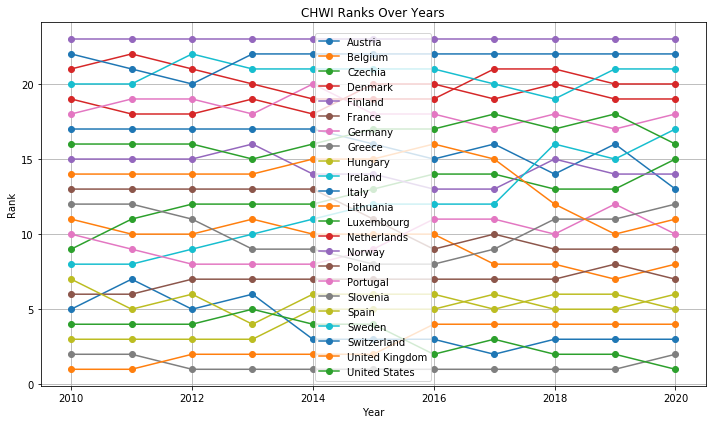

In [159]:
plt.figure(figsize=(10, 6))
for state in df_index['Reference area'].unique():
    subset = df_index[df_index['Reference area'] == state]
    plt.plot(subset['TIME_PERIOD'], subset['rank'], marker='o', label=state)
plt.title('CHWI Ranks Over Years')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [160]:
df_index.to_csv('all_index.csv', index=False)  

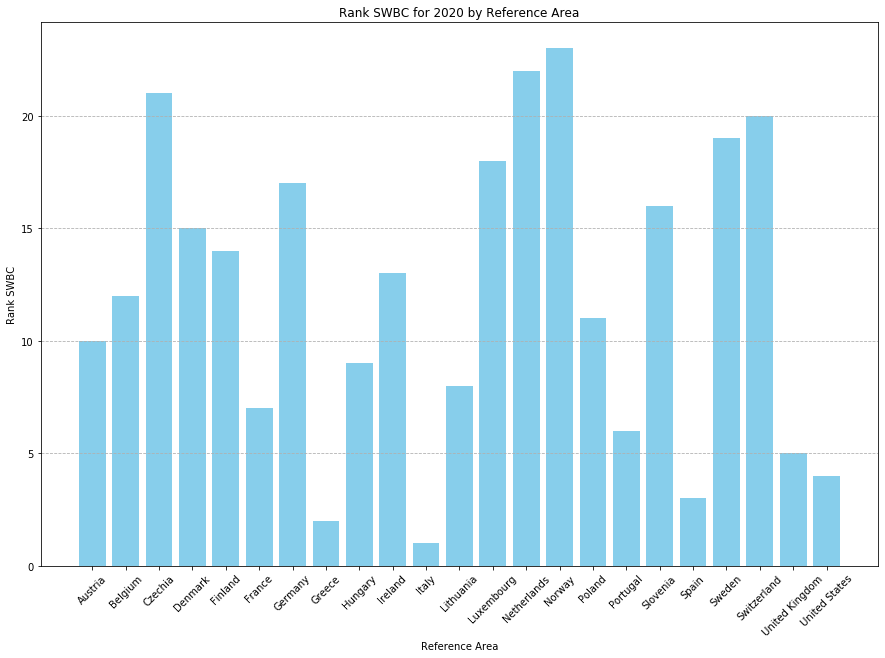

In [165]:
df_2020 = df_index[df_index["TIME_PERIOD"] == 2020]

plt.figure(figsize=(15, 10))
plt.bar(df_2020["Reference area"], df_2020["rank_swbc"], color='skyblue')
plt.title('Rank SWBC for 2020 by Reference Area')
plt.xlabel('Reference Area')
plt.ylabel('Rank SWBC')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

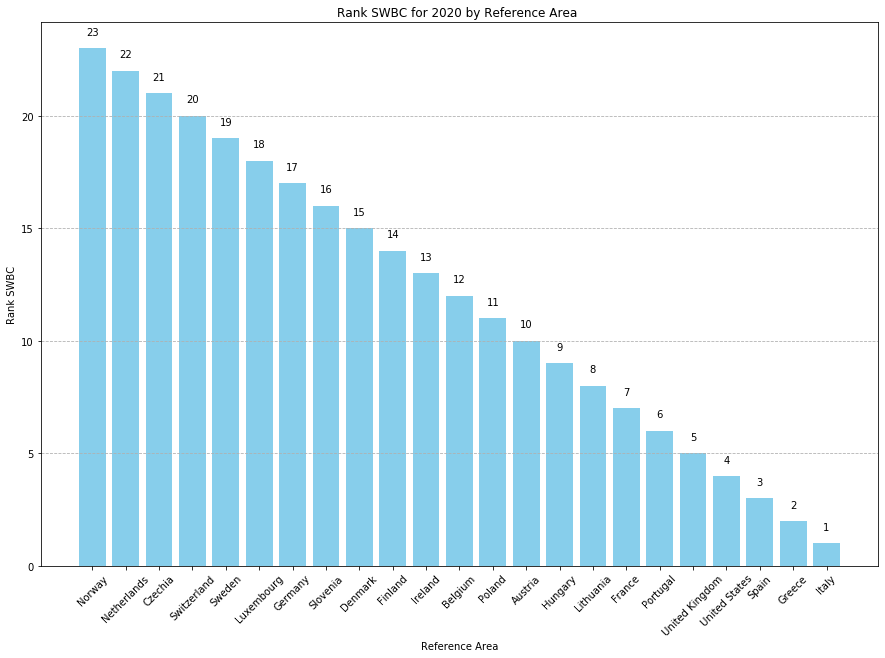

In [170]:
df_2020_sorted = df_2020.sort_values(by="rank_swbc", ascending=False)
plt.figure(figsize=(15, 10))
bars = plt.bar(df_2020_sorted["Reference area"], df_2020_sorted["rank_swbc"], color='skyblue')

# Adding the rank on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.title('Rank SWBC for 2020 by Reference Area ')
plt.xlabel('Reference Area')
plt.ylabel('Rank SWBC')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

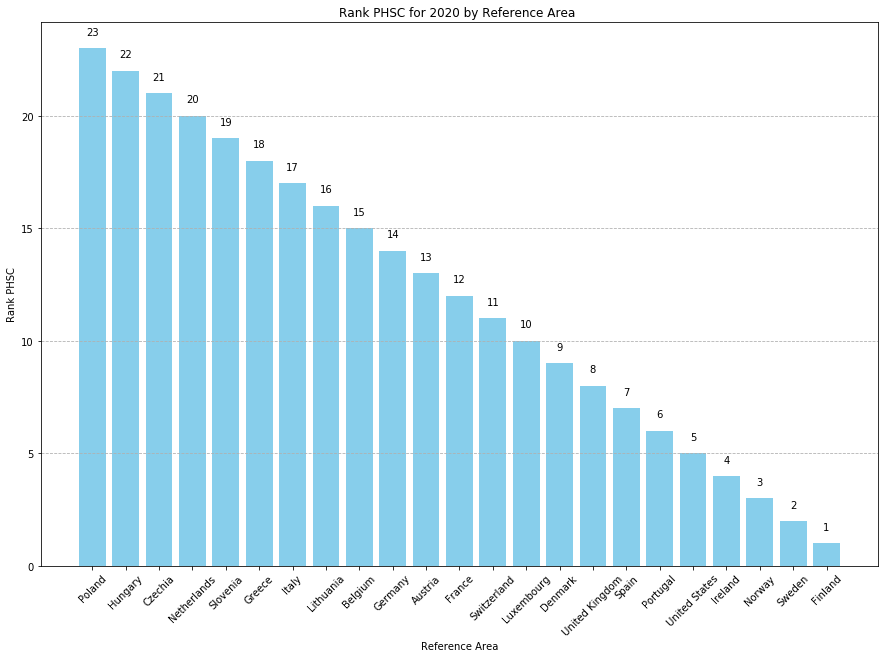

In [171]:
df_2020_sorted = df_2020.sort_values(by="rank_phsc", ascending=False)
plt.figure(figsize=(15, 10))
bars = plt.bar(df_2020_sorted["Reference area"], df_2020_sorted["rank_phsc"], color='skyblue')

# Adding the rank on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.title('Rank PHSC for 2020 by Reference Area ')
plt.xlabel('Reference Area')
plt.ylabel('Rank PHSC')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

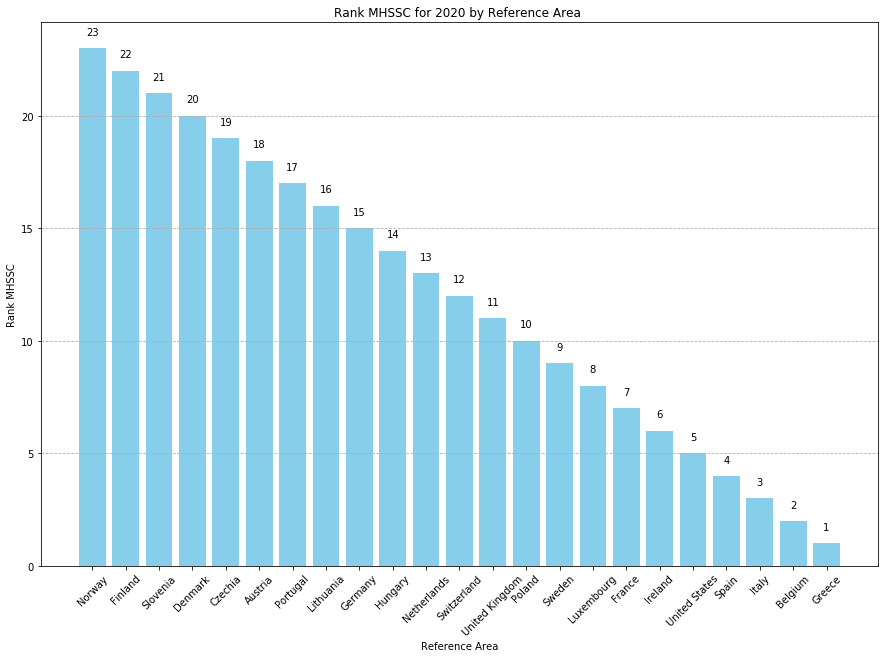

In [172]:
df_2020_sorted = df_2020.sort_values(by="rank_mhssc", ascending=False)
plt.figure(figsize=(15, 10))
bars = plt.bar(df_2020_sorted["Reference area"], df_2020_sorted["rank_mhssc"], color='skyblue')

# Adding the rank on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.title('Rank MHSSC for 2020 by Reference Area ')
plt.xlabel('Reference Area')
plt.ylabel('Rank MHSSC')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

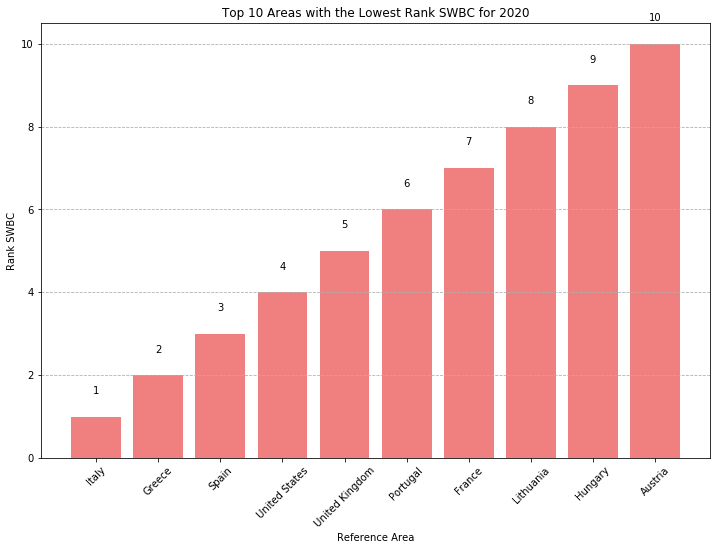

In [173]:
df_top10_swbc = df_2020.sort_values(by="rank_swbc", ascending=True).head(10)

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(df_top10_swbc["Reference area"], df_top10_swbc["rank_swbc"], color='lightcoral')

# Adding the rank on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.title('Top 10 Areas with the Lowest Rank SWBC for 2020')
plt.xlabel('Reference Area')
plt.ylabel('Rank SWBC')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

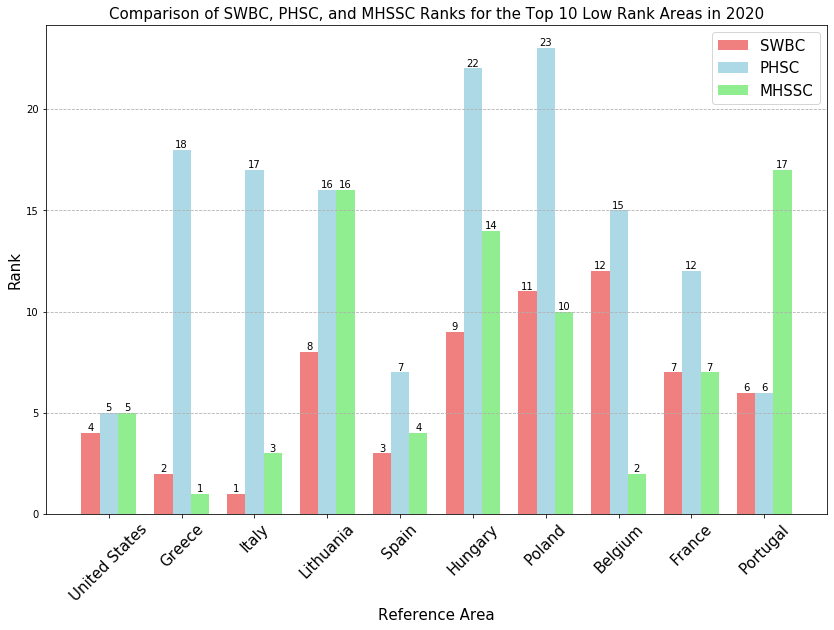

In [180]:
plt.figure(figsize=(14, 9))
bar_width = 0.25

df_top10 = df_2020.sort_values(by="rank", ascending=True).head(10)

index = np.arange(len(df_top10["Reference area"]))

bars1 = plt.bar(index, df_top10["rank_swbc"], bar_width, label='SWBC', color='lightcoral')
bars2 = plt.bar(index + bar_width, df_top10["rank_phsc"], bar_width, label='PHSC', color='lightblue')
bars3 = plt.bar(index + 2 * bar_width, df_top10["rank_mhssc"], bar_width, label='MHSSC', color='lightgreen')

# Adding the rank on top of each bar
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

plt.xlabel('Reference Area',fontsize=15)
plt.ylabel('Rank',fontsize=15)
plt.title('Comparison of SWBC, PHSC, and MHSSC Ranks for the Top 10 Low Rank Areas in 2020',fontsize=15)
plt.xticks(index + bar_width, df_top10["Reference area"], rotation=45,fontsize=15)
plt.legend(fontsize=15)
plt.grid(axis='y', linestyle='--')
plt.show()